# Importing libraries

In [ ]:
## Basic imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
## Specific imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

#Loading the DataSet and Reducing the Features of Interest

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls /content/drive/MyDrive/Warfarin_Dose_Prediction_Dataset.xls

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 6.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
import pandas as pd
original_df = pd.read_excel('/content/drive/MyDrive/Warfarin_Dose_Prediction_Dataset.xls')

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 68 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PharmGKB Subject ID                                                   5700 non-null   object 
 1   PharmGKB Sample ID                                                    5700 non-null   object 
 2   Project Site                                                          5700 non-null   int64  
 3   Gender                                                                5696 non-null   object 
 4   Race (Reported)                                                       5194 non-null   object 
 5   Race (OMB)                                                            5700 non-null   object 
 6   Ethnicity (Reported)                                                  4461 non-null   object 
 7

In [ ]:
patients = original_df[['Gender','Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
                     'Target INR', 'INR on Reported Therapeutic Dose of Warfarin', 'Cyp2C9 genotypes',
                     'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'Therapeutic Dose of Warfarin']].copy()

In [ ]:
patients.head(n=5)

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,male,White,60 - 69,193.040,115.7,NaN,0.0,0.0,2.5,2.60,*1/*1,A/G,49.0
1,female,White,50 - 59,176.530,144.2,NaN,0.0,0.0,2.5,2.15,*1/*1,A/A,42.0
2,female,White,40 - 49,162.560,77.1,NaN,0.0,0.0,2.5,1.90,*1/*1,G/G,53.0
3,male,White,60 - 69,182.245,90.7,NaN,0.0,0.0,2.5,2.40,*1/*1,A/G,28.0
4,male,White,50 - 59,167.640,72.6,NaN,0.0,0.0,2.5,1.90,*1/*3,A/G,42.0


In [ ]:
patients.describe()

,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin
count,4554.000000,5413.000000,3283.000000,3861.000000,4182.000000,1259.000000,4968.000000,5528.000000
mean,168.047778,77.852569,0.187024,0.146335,0.066236,2.538324,2.364438,30.977887
std,10.845992,21.859764,0.389990,0.353488,0.248724,0.198140,0.464644,16.801048
min,124.968000,30.000000,0.000000,0.000000,0.000000,1.300000,0.800000,2.100000
25%,160.020000,62.000000,0.000000,0.000000,0.000000,2.500000,2.100000,19.530000
50%,167.894000,75.000000,0.000000,0.000000,0.000000,2.500000,2.400000,28.000000
75%,176.022000,90.000000,0.000000,0.000000,0.000000,2.500000,2.610000,38.500000
max,202.000000,237.700000,1.000000,1.000000,1.000000,3.500000,6.100000,315.000000


In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5696 non-null   object 
 1   Race (Reported)                                                    5194 non-null   object 
 2   Age                                                                5658 non-null   object 
 3   Height (cm)                                                        4554 non-null   float64
 4   Weight (kg)                                                        5413 non-null   float64
 5   Diabetes                                                           3283 non-null   float64
 6   Simvastatin (Zocor)                                                3861 non-null   float64
 7   Amiodarone (Cordarone)  

In [ ]:
patients.to_excel("patients_df_reduced.xlsx")

# Setting aside a validation set right away
separates dataset into patients_df (95%) and validation_set (5%)

In [ ]:
from sklearn.model_selection import train_test_split

patients_df, validation_set = train_test_split(patients, test_size=0.05, random_state=42)

# Visualizing Data Features and Correlations on whole dataset (minus validation set)

###Looking at Numerical Data (note that some of these are numerical catagorical but are entered as 0 or 1)

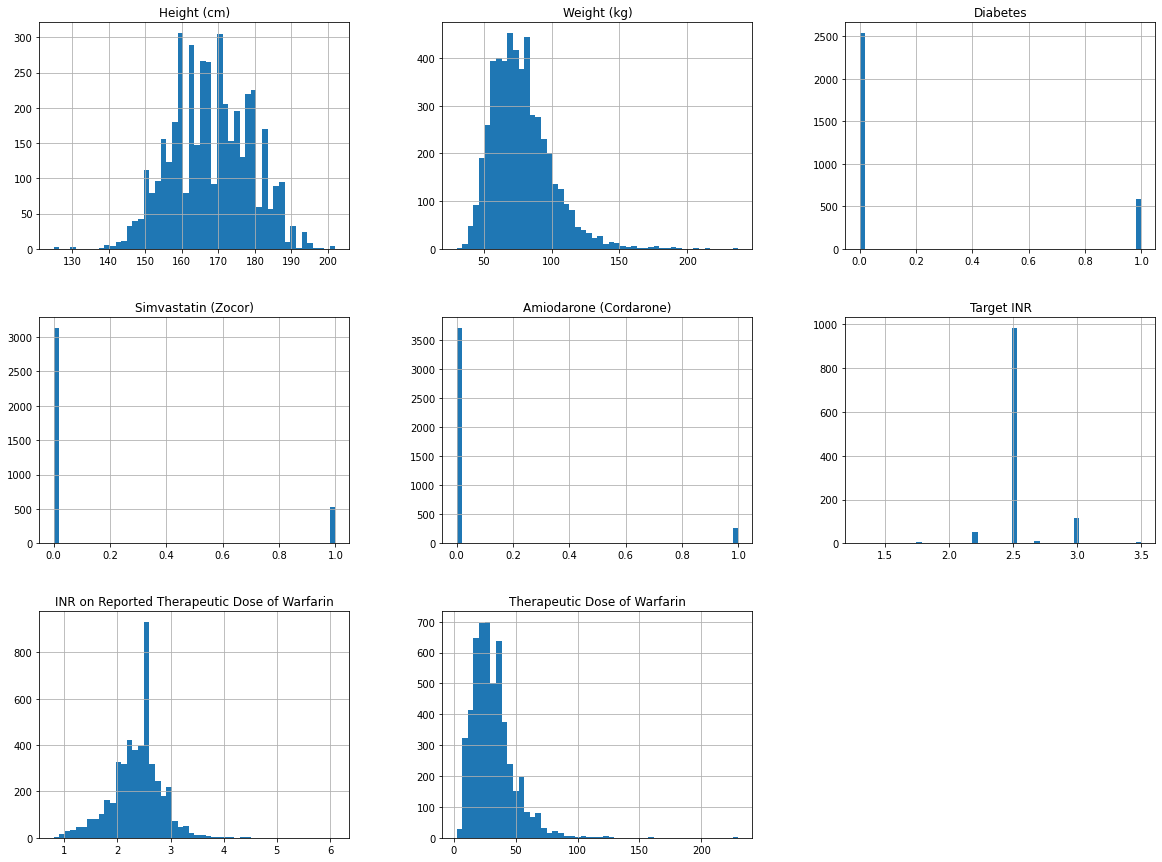

In [ ]:
%matplotlib inline
patients_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = patients_df.corr()
corr_matrix["Therapeutic Dose of Warfarin"].sort_values(ascending=False)

Therapeutic Dose of Warfarin                    1.000000
Weight (kg)                                     0.396088
Height (cm)                                     0.326714
INR on Reported Therapeutic Dose of Warfarin    0.194468
Target INR                                      0.075469
Diabetes                                        0.038240
Simvastatin (Zocor)                             0.020619
Amiodarone (Cordarone)                         -0.101876
Name: Therapeutic Dose of Warfarin, dtype: float64

In [ ]:
# note that Target INR and INR on Reported Therapeutic Dose of Warfarin are linearly related. Target INR has so few values that I will remove it as part of pre-processing
corr_matrix["Target INR"].sort_values(ascending=False)

Target INR                                      1.000000
INR on Reported Therapeutic Dose of Warfarin    0.417300
Therapeutic Dose of Warfarin                    0.075469
Simvastatin (Zocor)                             0.015419
Weight (kg)                                    -0.035896
Amiodarone (Cordarone)                         -0.049894
Height (cm)                                    -0.051297
Diabetes                                       -0.056115
Name: Target INR, dtype: float64

### Looking at Catagorical Text Data (Use these catagories for gradio implementation later)

In [ ]:
patients_df['Gender'].value_counts()

male      3151
female    2260
Name: Gender, dtype: int64

In [ ]:
patients_df['Age'].value_counts()

70 - 79    1487
60 - 69    1311
50 - 59    1036
80 - 89     639
40 - 49     518
30 - 39     220
20 - 29     122
90+          32
10 - 19      13
Name: Age, dtype: int64

In [ ]:
patients_df['Race (Reported)'].value_counts()

White                        2121
Japanese                      785
Caucasian                     673
Korean                        256
Han Chinese                   237
Black                         231
Black or African American     223
Chinese                       141
Malay                          82
Intermediate                   62
Indian                         37
African-American               19
Other Mixed Race               17
Asian                          17
Hispanic                       12
Other                          10
Black other                     3
other                           1
Black African                   1
Other (Black British)           1
Other (Hungarian)               1
Black Caribbean                 1
Name: Race (Reported), dtype: int64

In [ ]:
patients_df['Target INR'].value_counts()

2.50    985
3.00    117
2.20     53
2.70     10
3.50      8
1.75      5
2.00      3
2.80      3
2.30      3
3.25      1
1.30      1
2.60      1
Name: Target INR, dtype: int64

In [ ]:
patients_df['Diabetes'].value_counts()

0.0    2539
1.0     590
Name: Diabetes, dtype: int64

In [ ]:
patients_df['Simvastatin (Zocor)'].value_counts()

0.0    3136
1.0     532
Name: Simvastatin (Zocor), dtype: int64

In [ ]:
patients_df['Amiodarone (Cordarone)'].value_counts()

0.0    3711
1.0     263
Name: Amiodarone (Cordarone), dtype: int64

In [ ]:
patients_df['Cyp2C9 genotypes'].value_counts()

*1/*1     3948
*1/*2      711
*1/*3      477
*2/*3       67
*2/*2       54
*3/*3       21
*1/*5        6
*1/*11       4
*1/*6        3
*1/*14       1
*1/*13       1
Name: Cyp2C9 genotypes, dtype: int64

In [ ]:
patients_df['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].value_counts()

A/A    1389
A/G    1348
G/G    1097
Name: VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T, dtype: int64

# Dropping any rows that have Nan in the target column ON WHOLE DATASET

In [ ]:
# Dropping any rows that have Nan in the target column
patients_df.dropna(subset=['Therapeutic Dose of Warfarin'], inplace=True)
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5257 entries, 4796 to 860
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5253 non-null   object 
 1   Race (Reported)                                                    4773 non-null   object 
 2   Age                                                                5222 non-null   object 
 3   Height (cm)                                                        4231 non-null   float64
 4   Weight (kg)                                                        4999 non-null   float64
 5   Diabetes                                                           2983 non-null   float64
 6   Simvastatin (Zocor)                                                3568 non-null   float64
 7   Amiodarone (Cordarone)

# Dividing Data into Statified Train (80%) and Test Set (20%)
This includes minimal pre-processing of gender and weight on the full dataset that was necessary for the statified sampling based on weight
Test and Train Sets with features and labels are stored in ;'strat_train_set' and 'strat_test_set'

patients_df -> strat_train_set, strat_test_set

### Perform Statified Sampling based on Weight (Chapter 2 Pages 54-55)

### Dropping Rows with Nan Gender Columns (since there are only 4 of them) -- NEED TO DO BEFORE STAT SAMPLING IN THIS CASE

In [ ]:
patients_df.dropna(subset=['Gender'], inplace=True)

#### Replacing Nan values in weight group with median based on Gender as is needed to perform statified sampling for the weight group

In [ ]:
median_female_weight=patients_df.loc[patients_df['Gender'] == 'female', 'Weight (kg)'].median()
median_female_weight

66.7

In [ ]:
median_male_weight=patients_df.loc[patients_df['Gender'] == 'male', 'Weight (kg)'].median()
median_male_weight

80.0

In [ ]:
medians = patients_df.groupby(['Gender'])['Weight (kg)'].median()
patients_df = patients_df.set_index(['Gender'])
patients_df['Weight (kg)'] = patients_df['Weight (kg)'].fillna(medians)
patients_df = patients_df.reset_index()

In [ ]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5253 non-null   object 
 1   Race (Reported)                                                    4769 non-null   object 
 2   Age                                                                5220 non-null   object 
 3   Height (cm)                                                        4227 non-null   float64
 4   Weight (kg)                                                        5253 non-null   float64
 5   Diabetes                                                           2983 non-null   float64
 6   Simvastatin (Zocor)                                                3568 non-null   float64
 7   Amiodarone (Cordarone)  

#### Creating Weight Catagories from which the test set will sample from

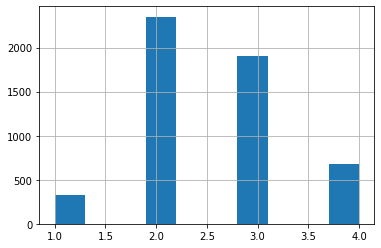

In [ ]:
patients_df["weight_cat"] = pd.cut(patients_df["Weight (kg)"], bins=[0, 50, 75, 100, np.inf],
labels=[1, 2, 3, 4])
patients_df["weight_cat"].hist()

#### Dividing patients_df into strat_train_set (80%) and strat_test_set (20%) distribution

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(patients_df, patients_df["weight_cat"]):
  strat_train_set = patients_df.loc[train_index]
  strat_test_set = patients_df.loc[test_index]

#### Comparing proportion of samples per weight catagory between test set and original dataset
#####(distrbutions are the same, showing that the stratified sampling worked)

In [ ]:
strat_test_set["weight_cat"].value_counts() / len(strat_test_set)

2    0.447193
3    0.362512
4    0.128449
1    0.061846
Name: weight_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("weight_cat", axis=1, inplace=True)

In [ ]:
patients_df["weight_cat"].value_counts() / len(patients_df)

2    0.447363
3    0.362460
4    0.128117
1    0.062060
Name: weight_cat, dtype: float64

## Visualizing Training Set Features and Visualizing Effects of Pre-processing Steps
##### (height, weight, and some catagorical variables)--nothing permanent done here--all incorporated into transformer later

### Visualizing Outliers in Weight Class
##### (not getting rid of outliers as they represent natural variation)

In [ ]:
# reference: https://statisticsbyjim.com/basics/remove-outliers/

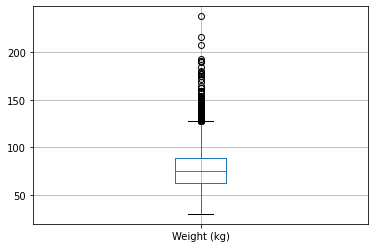

In [ ]:
strat_train_set.boxplot(column='Weight (kg)')

In [ ]:
strat_train_set[['Weight (kg)']].describe()
# note that the high of 237.7 kg represents around 522 lbs which is plausible to see in a population

,Weight (kg)
count,4202.000000
mean,77.770239
std,21.522528
min,30.000000
25%,63.000000
50%,75.000000
75%,88.900000
max,237.700000


### Visualizing method for replacing Nan values in height group with median based on Gender

In [ ]:
# souce 1: https://stackoverflow.com/questions/33457191/python-pandas-dataframe-fill-nans-with-a-conditional-mean
# source 2: https://www.statology.org/conditional-mean-pandas/

In [ ]:
median_female_height=strat_train_set.loc[strat_train_set['Gender'] == 'female', 'Height (cm)'].median()
median_female_height

160.01999999982718

In [ ]:
median_male_height=strat_train_set.loc[strat_train_set['Gender'] == 'male', 'Height (cm)'].median()
median_male_height

173.98999999981208

##### Copy of Strat_train_set created for testing purposes

In [ ]:
strat_train_set_copy = strat_train_set.copy()

In [ ]:
strat_train_set_copy.head(n=3)

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
813,male,White,50 - 59,175.006,84.0,0.0,1.0,0.0,NaN,2.20,*1/*1,A/G,38.5
4632,male,Japanese,50 - 59,169.926,78.0,NaN,NaN,NaN,NaN,1.35,*1/*1,A/G,7.0
829,male,Japanese,50 - 59,171.958,60.2,NaN,NaN,NaN,NaN,1.27,*1/*1,A/A,14.0


In [ ]:
# getting gender specific medians for training set
medians = strat_train_set_copy.groupby(['Gender'])['Height (cm)'].median()

In [ ]:
strat_train_set_copy = strat_train_set_copy.set_index(['Gender'])
strat_train_set_copy['Height (cm)'] = strat_train_set_copy['Height (cm)'].fillna(medians)
strat_train_set_copy = strat_train_set_copy.reset_index()

In [ ]:
strat_train_set_copy.head(n=3)

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
0,male,White,50 - 59,175.006,84.0,0.0,1.0,0.0,NaN,2.20,*1/*1,A/G,38.5
1,male,Japanese,50 - 59,169.926,78.0,NaN,NaN,NaN,NaN,1.35,*1/*1,A/G,7.0
2,male,Japanese,50 - 59,171.958,60.2,NaN,NaN,NaN,NaN,1.27,*1/*1,A/A,14.0


### Visualizing Race Distribution
#### Includes Visualization of pre-processing steps implemented later

In [ ]:
strat_train_set_copy = strat_train_set.copy()

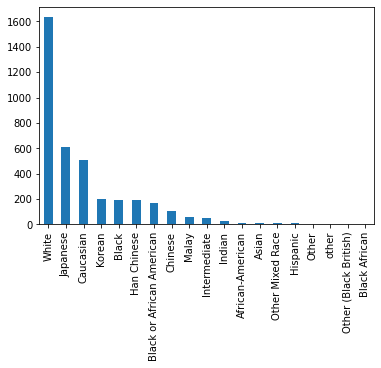

In [ ]:
strat_train_set_copy['Race (Reported)'].value_counts().plot(kind='bar')

In [ ]:
strat_train_set_copy['Race (Reported)'] = strat_train_set_copy['Race (Reported)'].fillna("UNSPECIFIED")
strat_train_set_copy['Race (Reported)'] = strat_train_set_copy['Race (Reported)'].str.upper()

In [ ]:
strat_train_set_copy = strat_train_set_copy.replace({'Race (Reported)': {'AFRICAN-AMERICAN': 'BLACK OR AFRICAN AMERICAN', 'BLACK': 'BLACK OR AFRICAN AMERICAN'}})

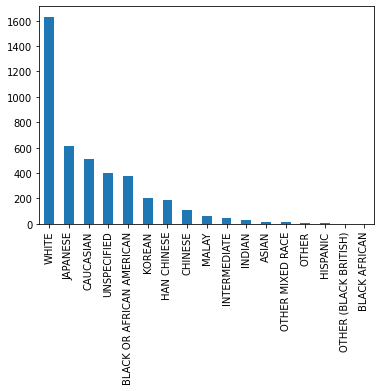

In [ ]:
strat_train_set_copy['Race (Reported)'].value_counts().plot(kind='bar')

### Visualizing Age Distribution
#### Replace Age Nan Values with mode from train set in pipeline

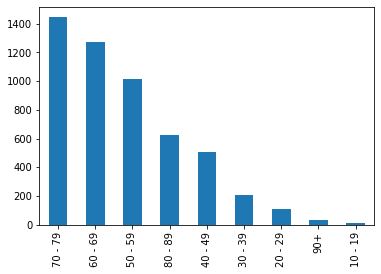

In [ ]:
patients_df['Age'].value_counts().plot(kind='bar')

### Visualizing Diabetes Distribution
#### Replace Diabetes Nan Values with mode from train set in pipeline

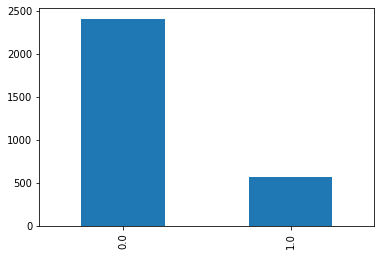

In [ ]:
patients_df['Diabetes'].value_counts().plot(kind='bar')

### Visualizing Simvastatin Distribution
#### Replace Simvastatin Nan Values with mode from train set in pipeline

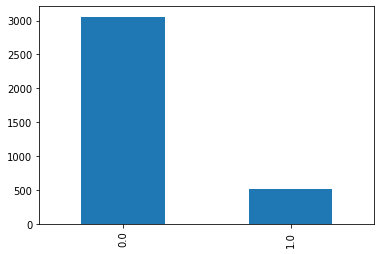

In [ ]:
patients_df['Simvastatin (Zocor)'].value_counts().plot(kind='bar')

### Visualizing Amiodarone Distribution
#### Replace Amiodarone Nan Values with mode from train set in pipeline

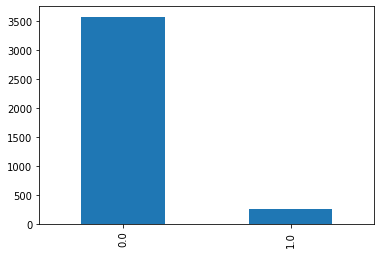

In [ ]:
patients_df['Amiodarone (Cordarone)'].value_counts().plot(kind='bar')

### Visualizing Cyp2C9 Distribution
#### Includes Visualization of Pre-processing steps implemented later
#### Replace Cyp2C9 Nan Values with mode from train set in pipeline

In [ ]:
strat_train_set_copy = strat_train_set.copy()

In [ ]:
strat_train_set_copy['Cyp2C9 genotypes'].value_counts()

*1/*1     3076
*1/*2      537
*1/*3      375
*2/*3       56
*2/*2       43
*3/*3       15
*1/*5        5
*1/*11       4
*1/*6        3
*1/*13       1
*1/*14       1
Name: Cyp2C9 genotypes, dtype: int64

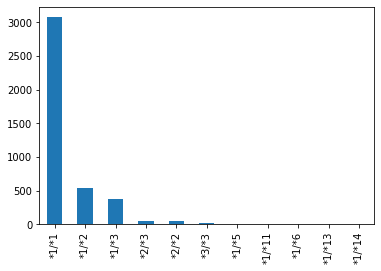

In [ ]:
strat_train_set_copy['Cyp2C9 genotypes'].value_counts().plot(kind='bar')

In [ ]:
strat_train_set_copy['Cyp2C9 genotypes'] = strat_train_set_copy['Cyp2C9 genotypes'].fillna(strat_train_set_copy['Cyp2C9 genotypes'].mode()[0])

In [ ]:
strat_train_set['Cyp2C9 genotypes'].mode()[0]

'*1/*1'

In [ ]:
strat_train_set_copy['Cyp2C9 genotypes'].value_counts()

*1/*1     3162
*1/*2      537
*1/*3      375
*2/*3       56
*2/*2       43
*3/*3       15
*1/*5        5
*1/*11       4
*1/*6        3
*1/*13       1
*1/*14       1
Name: Cyp2C9 genotypes, dtype: int64

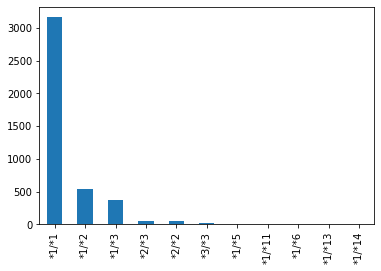

In [ ]:
strat_train_set_copy['Cyp2C9 genotypes'].value_counts().plot(kind='bar')

### Visualizing VKORC1 genotype
#### Includes Visualization of Pre-processing Steps Implemented Later
#### Replacing VKORC1 genotype Nan Values with 'Unknown' since there is no obvious mode (creates new catagory)

In [ ]:
strat_train_set_copy = strat_train_set.copy()

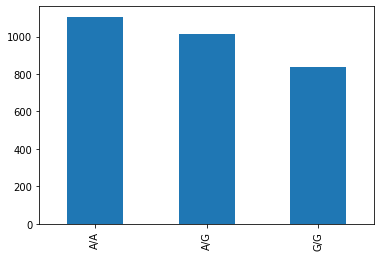

In [ ]:
strat_train_set_copy['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].value_counts().plot(kind='bar')

In [ ]:
strat_train_set_copy['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']=strat_train_set_copy['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].fillna("Unknown")

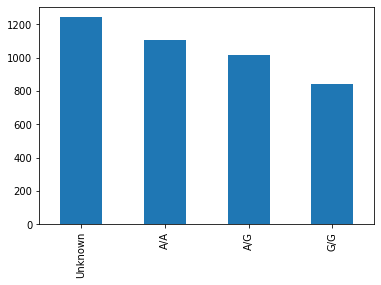

In [ ]:
strat_train_set_copy['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].value_counts().plot(kind='bar')

## Deciding whether to add a New Class (BMI) based on correlations
#####(just testing things but decided not to add BMI due to multicollinearity with weight)
##### BSA decided per reference https://doi.org/10.1155/2015/560108

### Making a copy of original dataset for manipulation

In [ ]:
patients_df_copy = patients_df.copy()

### Looking at Correlations in the Original Data Set (Chapter 2 Pages 58-61)

In [ ]:
corr_matrix = patients_df.corr()

In [ ]:
corr_matrix["Therapeutic Dose of Warfarin"].sort_values(ascending=False)
# I tested it and the correlation is not as good when the weight and height are filled with the overall median rather the median associated with a certain gender

Therapeutic Dose of Warfarin                    1.000000
Weight (kg)                                     0.387442
Height (cm)                                     0.327824
INR on Reported Therapeutic Dose of Warfarin    0.195234
Target INR                                      0.075469
Diabetes                                        0.038240
Simvastatin (Zocor)                             0.020619
Amiodarone (Cordarone)                         -0.101876
Name: Therapeutic Dose of Warfarin, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Therapeutic Dose of Warfarin", "Weight (kg)", "Height (cm)", "INR on Reported Therapeutic Dose of Warfarin", "Diabetes", "Simvastatin (Zocor)", "Amiodarone (Cordarone)"]
# scatter_matrix(patients_train_copy[attributes], figsize=(18, 12))

### Testing the Correlation for a New Feature (BMI) (Chapter 2 Page 62)

In [ ]:
patients_df_copy["BMI"] = patients_df_copy["Weight (kg)"]/((patients_df_copy["Height (cm)"]/100)**2)

In [ ]:
patients_df_copy.head(n=3)

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin,weight_cat,BMI
0,male,Malay,60 - 69,NaN,62.0,NaN,NaN,NaN,NaN,2.27,*1/*1,NaN,14.0,2,NaN
1,female,White,80 - 89,156.9974,75.0,0.0,0.0,0.0,NaN,2.30,*1/*3,G/G,14.0,2,30.428206
2,male,Japanese,30 - 39,172.9740,52.0,NaN,NaN,NaN,NaN,2.19,*1/*1,A/A,14.0,2,17.379676


In [ ]:
corr_matrix = patients_df_copy.corr()
corr_matrix["BMI"].sort_values(ascending=False)

BMI                                             1.000000
Weight (kg)                                     0.883323
Therapeutic Dose of Warfarin                    0.312606
Diabetes                                        0.192105
INR on Reported Therapeutic Dose of Warfarin    0.164335
Height (cm)                                     0.134963
Simvastatin (Zocor)                             0.072737
Amiodarone (Cordarone)                         -0.007698
Target INR                                     -0.023432
Name: BMI, dtype: float64

## Separate the data from the labels in training set:
##### strat_train_set -> patients_info and patients_labels

In [ ]:
patients_info = strat_train_set.drop("Therapeutic Dose of Warfarin", axis=1) # drop labels for training set
patients_labels = strat_train_set["Therapeutic Dose of Warfarin"].copy()

## Code for testing/understanding use of imputers and catagorical encoders
##### (currently commented out--can un-comment for testing use)

### Removing Columns with Text Attributes (testing)

In [ ]:
# patients_num = patients_info[['Height (cm)', 'Weight (kg)', 'INR on Reported Therapeutic Dose of Warfarin']]
# patients_num.head()

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")

In [ ]:
# imputer.fit(patients_num)

In [ ]:
# imputer.statistics_

#### Transform the Training Set (testing)

In [ ]:
# X = imputer.transform(patients_num)

In [ ]:
# patients_tr = pd.DataFrame(X, columns=patients_num.columns,
#                           index=patients_info.index)

In [ ]:
# patients_tr.loc[patients_info.index.values]

In [ ]:
# imputer.strategy

### Handling Text and Categorical Attributes (testing)

In [ ]:
# patients_cat = patients_info[["Gender"]]
# patients_cat.head(5)

#### Testing Using 1Hot Encoder

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import preprocessing

# cat_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# patients_cat_1hot = cat_encoder.fit_transform(patients_cat)

In [ ]:
# cat_encoder.categories_

## Custom Transformers for Pre-processing (Important Part)
##### reference: Chapter 2 Textbook associated google collab notebook

##### creating a custom transformer to handle catagorical attributes Nan Values:
##### includes Gender, Cyp2C9 genotypes, VKORC1 genotype, Diabetes, Amiodarone, Simvastatin, Race, Age

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CatTransformer(BaseEstimator, TransformerMixin):
    """
    REPLACEMENT OF NAN FOR ALL CATAGORICAL FEATURES
    for Gender, fills with mode from training set
    for Cyp2C9 genotypes, fills with mode from training set as there is a most common class by far
    for VKORC1 genotype, many more are unknown, and there is not a most common class, so fills with "unknown", thus creating a new catagory
    for Diabetes phenotype, fills with mode--assumes no diabetes
    for Amiodarone (Cordarone) drug, fills with mode from training set as there is a most common class by far
    for Simvastatin (Zocor), fills with mode from training set as there is a most common class by far
    for Race, fills nan with "unknown" and converts all classes to upper so that the several groups labelled "other" are grouped together
    for Race, only a few were missing--replacement of nan with Mode
    for Race, due to there already being a catagory for "Black or African American", the catagories "Black" and "African American" were grouped together under "Black or African American"
    for Age, fills nan with mode from training set--not many Age values are missing. Even though there is not a most common class by a lot, I think this is best
    """
    def __init__(self): # no *args or **kwargs
      pass
    def fit(self, X, y=None):
      self.mode_Gen = X['Gender'].mode()[0]
      self.mode_Cyp = X['Cyp2C9 genotypes'].mode()[0]
      self.mode_Amio = X['Amiodarone (Cordarone)'].mode()[0]
      self.mode_Simv = X['Simvastatin (Zocor)'].mode()[0]
      self.mode_Diab = X['Diabetes'].mode()[0]
      self.mode_Age = X['Age'].mode()[0]
      return self
    def transform(self, X):
      X['Cyp2C9 genotypes']=X['Cyp2C9 genotypes'].fillna(self.mode_Cyp)
      X['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']=X['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].fillna("Unknown")
      X['Amiodarone (Cordarone)']=X['Amiodarone (Cordarone)'].fillna(self.mode_Amio)
      X['Simvastatin (Zocor)']=X['Simvastatin (Zocor)'].fillna(self.mode_Simv)
      X['Diabetes']=X['Diabetes'].fillna(self.mode_Diab)
      X['Race (Reported)'] = X['Race (Reported)'].fillna("UNSPECIFIED")
      X['Race (Reported)'] = X['Race (Reported)'].str.upper()
      X=X.replace({'Race (Reported)': {'AFRICAN-AMERICAN': 'BLACK OR AFRICAN AMERICAN', 'BLACK': 'BLACK OR AFRICAN AMERICAN'}})
      X['Age']=X['Age'].fillna(self.mode_Age)
      X['Gender']=X['Gender'].fillna(self.mode_Gen)
      return X

##### creating a custom transformer to handle the transformation of height nan variables based on gender-depenedent median

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GenderTransformer(BaseEstimator, TransformerMixin):
    """
    replaces missing Height variables by median for the associated gender
    replaces missing Weight variables by median for the associated gender
    """
    def __init__(self): # no *args or **kwargs
      pass
    def fit(self, X, y=None):
      self.medians_height = X.groupby(['Gender'])["Height (cm)"].median()
      self.medians_weight = X.groupby(['Gender'])["Weight (kg)"].median()
      return self
    def transform(self, X):
      X = X.set_index(['Gender'])
      X["Height (cm)"] = X["Height (cm)"].fillna(self.medians_height)
      X["Weight (kg)"] = X["Weight (kg)"].fillna(self.medians_weight)
      X = X.reset_index()
      return X

##### creating a custom transformer to add extra attributes (BMI, BSA):

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = ["Height (cm)", "Weight (kg)"]
weight_ix, height_ix = [0, 1] # get the column indices; they are 0 and 1
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    adds the variables for BSA (body surface area) to the data
    def transform returns numpy array
    Body Surface Area (as calculated from the DuBois and DuBois formula)
    reference: https://www.uptodate.com/contents/image?imageKey=ONC%2F96451&topicKey=ONC%2F83810&search=Pharmacogenomics&rank=3~18&source=see_link
    """
    def __init__(self): # no *args or **kwargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
      # BMI = X[:, weight_ix] / ((X[:, height_ix]/100)**2)
      BSA = ((0.007184*(X[:, weight_ix])**0.425)) * ((X[:, height_ix])**0.725)
      return np.c_[X, BSA]


#### Working Transformer Pipelines

##### pipeline for dealing with missing height and weight values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

gender_pipeline = Pipeline([
        ('gender_transformer', GenderTransformer()),
    ])

##### pipeline for dealing with catagorical data nan values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cat_pipeline = Pipeline([
        ('catagorical_transformer',  CatTransformer()),
    ])


##### pipeline for dealing with numerical data: height, weight, INR
##### uses CombinedAttributeAdder class for the addition of BSA (or BMI)
##### uses SimpleImputer to replace any remaining Nan values with the median for that feature
##### uses StandardScaler for scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

##### full pipuline using ColumnTransformer
##### Adds Attributes (from num_pipeline), Scales and imputes numerical data (from num_pipeline), Uses ordinal encoder for Ordinal Catagorical Data (Age), Uses 1Hot Encoder for non-ordinal Catagorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ['Height (cm)', 'Weight (kg)', 'INR on Reported Therapeutic Dose of Warfarin']
cat_attribs_ordinal = ['Age', 'Gender', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)']
cat_attribs_1hot = ["Race (Reported)",
                    'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
"""
Pipeline using column transformer
Adds BSA attribute (from num_pipeline)
imputes remaining nan numerical data using median (from num_pipeline)
scales numerical data using StandardScaler (from num_pipeline)
Uses ordinal encoder for Ordinal Catagorical Data (Age) and Binary Catagorical Data (gender, diabetes, simvastatin, amiodorone)--see cat_attrib_ordinal
Uses 1Hot Encoder for non-ordinal Catagorical Data--see cat_attribs_1hot
"""
scale_encode_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ('cat_ord', OrdinalEncoder(), cat_attribs_ordinal),
        ("cat_1hot", OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_attribs_1hot),
    ]) #input list of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

## Full PreProcess Function to incorporate all pipelines
##### contains "full_preprocess_function()"

In [ ]:
def series_to_df(data_series):
  """
  function to help with processing new data (potentially useful for Gradio implementation)
  input: Series with dimensions (12,)
  output: pandas dataframe with features as column names; can now be sent through full_preprocess_function
  """
  data_df = data_series.to_frame()
  data_df = data_df.transpose()
  return data_df

In [ ]:
def full_preprocess_function(data_df, train=False):
  """
  INPUT: program expects the equivalent of an instance (or multiple instances) from the non pre-processed dataset (without the label) in the form of a pandas_df

        --input should have the following 12 features as column names: Gender, Race (Reported), Age, Height (cm), Weight (kg), Diabetes, Simvastatin (Zocor), Amiodarone (Cordarone),
        Target INR, INR on Reported Therapeutic Dose of Warfarin,
        Cyp2C9 genotypes, VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
        --input should either contain a value for each feature of Nan

  program will remove the Target INR column from dataset as there were too few values and it was multicollinearly related to INR Reported
  if train==True, function will send training data to pre-processing be fit and transformed

  else, function will send new data to pre-processing to be transformed (not fit)
  OUTPUT: function returns pandas df of features, including feature names as column names
  Note for encoded variables:
  Gender: 0=female, 1=male;
  Diabetes: 0=no, 1=yes;
  Simvastatin: 0=no, 1=yes;
  Amiodorone: 0=no, 1=yes;
  Age: {0: '10 - 19', 1:'20 - 29', 2:'30 - 39', 3:'40 - 49', 4:'50 - 59', 5:'60 - 69', 6:'70 - 79', 7:'80 - 89', 8:'90+'}
  """
  if isinstance(data_df, pd.Series) and data_df.shape == (12,):
    raise TypeError("Expects pd.DataFrame; Send your data through the series_to_df() function for conversion to proper format")
  if not isinstance(data_df, pd.DataFrame):
    raise TypeError("Expects pd.DataFrame; See full_preprocess function documentation for input expectations")
  # prepared_feature_names = ['Height (cm)', 'Weight (kg)', 'INR (Reported)', 'BSA (m**2)', 'Age', 'Gender', 'Diabetes', 'Simvastatin', 'Amiodorone',
  #                  'ASIAN', 'BLACK OR AFRICAN AMERICAN', 'CAUCASIAN', 'CHINESE', 'HAN CHINESE', 'HISPANIC', 'INDIAN', 'INTERMEDIATE', 'JAPANESE', 'KOREAN', 'MALAY', 'OTHER','OTHER MIXED RACE', 'UNSPECIFIED', 'WHITE',
  #                  '*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5', '*1/*6', '*2/*2', '*2/*3', '*3/*3',
  #                  'A/A', 'A/G', 'G/G', 'Unknown']
  data_df.drop(['Target INR'], axis=1, inplace=True) # remove Target INR due to too few values and collinearity with INR Reported
  if train==True:
    data_cat_tr = cat_pipeline.fit_transform(data_df)
    data_height_tr = gender_pipeline.fit_transform(data_cat_tr)
    data_prepared = scale_encode_pipeline.fit_transform(data_height_tr)
  else:
    data_cat_tr = cat_pipeline.transform(data_df)
    data_height_tr = gender_pipeline.transform(data_cat_tr )
    data_prepared = scale_encode_pipeline.transform(data_height_tr)
  data_prepared_df =  pd.DataFrame(data_prepared)
  # data_prepared_df.drop(['Weight (kg)'], axis=1, inplace=True) # removing weight to address multicollinearity
  return data_prepared_df

##### Example test input for full_preprocess_function()
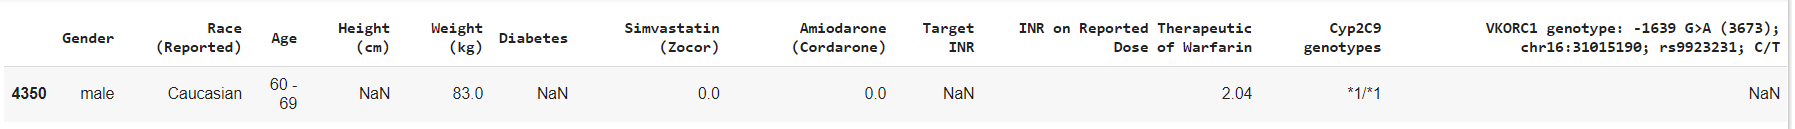

#### Getting OneHotEncoder Catagory Info and Testing Ordinal Encoding for Age (can be ignored)

In [ ]:
# data_cat_tr = cat_pipeline.fit_transform(patients_info)
# data_height_tr = gender_pipeline.fit_transform(data_cat_tr)

In [ ]:
# data_height_tr

In [ ]:
# data_height_tr_age = data_height_tr[['Age']]

In [ ]:
# cat_encoder = OrdinalEncoder()

In [ ]:
# patients_age_ord = cat_encoder.fit_transform(data_height_tr_age)

In [ ]:
# patients_age_ord

In [ ]:
# cat_encoder.categories_
# array([[7.],
#        [6.],
#        [6.],
#        ...,
#        [4.],
#        [7.],
#        [5.]])
# [array(['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69',
#         '70 - 79', '80 - 89', '90+'], dtype=object)]

In [ ]:
# cat_encoder.categories_
# [array(['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69',
#         '70 - 79', '80 - 89', '90+'], dtype=object),
#  array(['female', 'male'], dtype=object),
#  array(['ASIAN', 'BLACK OR AFRICAN AMERICAN',
#         'CAUCASIAN', 'CHINESE', 'HAN CHINESE', 'HISPANIC', 'INDIAN',
#         'INTERMEDIATE', 'JAPANESE', 'KOREAN', 'MALAY', 'OTHER',
#         'OTHER MIXED RACE', 'UNSPECIFIED', 'WHITE'], dtype=object),
#  array([0., 1.]),
#  array([0., 1.]),
#  array([0., 1.]),
#  array(['*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5',
#         '*1/*6', '*2/*2', '*2/*3', '*3/*3'], dtype=object),
#  array(['A/A', 'A/G', 'G/G', 'Unknown'], dtype=object)]

## Visualizing Multicollinearity for BSA, BMI, Weight, Height
##### see corr_matrix within, ignore code (will not run based on current dataset)
##### already incorporated results into full_preprocess_function

#### Correlation Matrix showing multi-collinearity between several variables
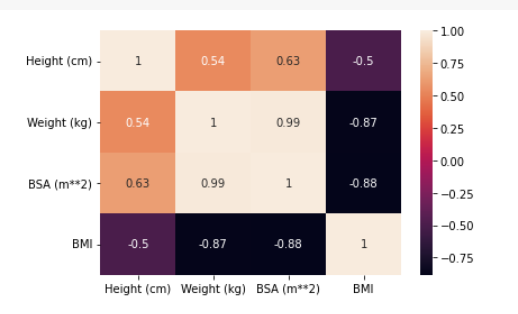

In [ ]:
# corr_matrix = X_train_prepared.corr()
# corr_matrix["Weight (kg)"].sort_values(ascending=False)
## Highest correlated
# Weight (kg)                  1.000000
# BSA                          0.992465
# Height (cm)                  0.539149
# BMI                         -0.869163

In [ ]:
# corr_matrix["Height (cm)"].sort_values(ascending=False)
# highest correlations with height
# male                         0.655107
# BSA                          0.632226
# Weight (kg)                  0.539149
# BMI                         -0.495230
# female                      -0.655107

In [ ]:
# corr_matrix["BMI"].sort_values(ascending=False)
# highest correlations with BMI
# Height (cm)                 -0.495230
# Weight (kg)                 -0.869163
# BSA (m**2)                  -0.882906

In [ ]:
# h_w_bmi_bsa = X_train_prepared[['Height (cm)', 'Weight (kg)', 'BSA (m**2)', 'BMI']]

In [ ]:
# import seaborn as sns
# ax = sns.heatmap(h_w_bmi_bsa.corr(), annot=True)

In [ ]:
# Based on these correlations, I removed weight and not add BMI. I kept BSA since BSA is known to be directly used to estimate drug dosage

## Sending training features data through pre-processing pipeline
##### patients_info -> 'X_train_prepared'
##### y_train stored in 'patients_labels'

In [ ]:
## showing un-pre-processed dataset
patients_info.head()

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
813,male,White,50 - 59,175.006,84.00,0.0,1.0,0.0,NaN,2.20,*1/*1,A/G
4632,male,Japanese,50 - 59,169.926,78.00,NaN,NaN,NaN,NaN,1.35,*1/*1,A/G
829,male,Japanese,50 - 59,171.958,60.20,NaN,NaN,NaN,NaN,1.27,*1/*1,A/A
4969,female,White,70 - 79,162.560,67.73,1.0,0.0,0.0,NaN,2.90,*1/*1,NaN
5151,female,Black,50 - 59,166.878,80.00,0.0,0.0,0.0,NaN,2.50,*1/*1,G/G


In [ ]:
X_train_prepared = full_preprocess_function(patients_info, train=True)

In [ ]:
# showing pre-processed training dataset
X_train_prepared.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.689150,0.289487,-0.387597,0.382503,4.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.189763,0.010677,-2.318512,0.055882,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.389518,-0.816462,-2.500245,-0.740618,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.534349,-0.466555,1.202569,-0.488400,6.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.109870,0.103614,0.293903,0.107003,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4202 non-null   float64
 1   1       4202 non-null   float64
 2   2       4202 non-null   float64
 3   3       4202 non-null   float64
 4   4       4202 non-null   float64
 5   5       4202 non-null   float64
 6   6       4202 non-null   float64
 7   7       4202 non-null   float64
 8   8       4202 non-null   float64
 9   9       4202 non-null   float64
 10  10      4202 non-null   float64
 11  11      4202 non-null   float64
 12  12      4202 non-null   float64
 13  13      4202 non-null   float64
 14  14      4202 non-null   float64
 15  15      4202 non-null   float64
 16  16      4202 non-null   float64
 17  17      4202 non-null   float64
 18  18      4202 non-null   float64
 19  19      4202 non-null   float64
 20  20      4202 non-null   float64
 21  21      4202 non-null   float64
 22  

##### Send pre-processed train_data to excel (labels too)

In [ ]:
X_train_prepared.to_excel("X_patients_train.xlsx")
patients_labels.to_excel('y_patients_train.xlsx')

## Making Sure Pre-processed training set works with basic model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, patients_labels)

LinearRegression()

In [ ]:
patients_labels

813     38.500000
4632     7.000000
829     14.000000
4969    39.974286
5151    32.500000
          ...    
1692    33.250000
4154    41.250000
1921    45.000000
1282    22.500000
1107    24.000000
Name: Therapeutic Dose of Warfarin, Length: 4202, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

patients_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(patients_labels, patients_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

12.45383742691575

## Pre-processing on Test Set (currently stored in strat_test_set)
##### note: strat_test_set contains features and labels
##### produces X_test_prepared and y_test

#### Separate strat_test_set features from labels
##### stored in X_test and y_test

In [ ]:
X_test = strat_test_set.drop("Therapeutic Dose of Warfarin", axis=1)
y_test = strat_test_set["Therapeutic Dose of Warfarin"].copy()

#### Send X_test to pre-processing function/pipeline
##### stored in X_test_prepared

In [ ]:
X_test_prepared = full_preprocess_function(X_test)

##### Send pre-processed test_data to excel (labels too)

In [ ]:
X_test_prepared.to_excel("X_patients_test.xlsx")
y_test.to_excel("y_patients_test.xlsx")

## Making sure Pre-processed testing set works with simple regression model

In [ ]:
test_predictions = lin_reg.predict(X_test_prepared)

#### Evaluate mse and rmse

In [ ]:
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

In [ ]:
test_rmse

11.799842965950868

## Pre-processing on Validation Set
##### produces X_val_prepared and y_val

#### Dropping nan labels and Separating validation_set features from labels
##### oridinally stored in 'X_val' and 'y_val'

In [ ]:
validation_set.dropna(subset=['Therapeutic Dose of Warfarin'], inplace=True)
X_val = validation_set.drop("Therapeutic Dose of Warfarin", axis=1)
y_val = validation_set["Therapeutic Dose of Warfarin"].copy()

## Sending a single instance from X_val through pre-processing pipeline and making sure it works with simple regression model

In [ ]:
trial = X_val.iloc[3]
trial

Gender                                                                    female
Race (Reported)                                                      Han Chinese
Age                                                                      70 - 79
Height (cm)                                                             150.0124
Weight (kg)                                                                 53.0
Diabetes                                                                     0.0
Simvastatin (Zocor)                                                          0.0
Amiodarone (Cordarone)                                                       0.0
Target INR                                                                   NaN
INR on Reported Therapeutic Dose of Warfarin                                2.16
Cyp2C9 genotypes                                                           *1/*1
VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T            A/A
Name: 1448, dtype: object

In [ ]:
trial.shape

(12,)

In [ ]:
trial_df = series_to_df(trial)

In [ ]:
# example of input for full_preprocessing_function()
trial_df

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
1448,female,Han Chinese,70 - 79,150.0124,53.0,0.0,0.0,0.0,NaN,2.16,*1/*1,A/A


In [ ]:
X_val_trial = full_preprocess_function(trial_df)

In [ ]:
# example of pre-processed single test input
X_val_trial

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-1.767836,-1.151035,-0.478463,-1.295217,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
trial_val_prediction = lin_reg.predict(X_val_trial)

In [ ]:
trial_val_prediction

array([12.51686591])

In [ ]:
y_trial = y_val.iloc[3]
y_trial

17.5

#### Sending X_val through pre-processing pipeline

In [ ]:
X_val_prepared = full_preprocess_function(X_val)

## Making sure pre-processed validation set works with simple regression model

In [ ]:
val_predictions = lin_reg.predict(X_val_prepared)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)

In [ ]:
val_rmse

20.28586218528997

##### Send pre-processed validation_data to excel (labels too)

In [ ]:
X_val_prepared.to_excel("X_patients_val.xlsx")
y_val.to_excel("y_patients_val.xlsx")

#**PART II ----> ML MODELS FOR BINAY CLASSIFICATION**





**First let's create a binary classification dataset by cutting the target values into two categories (<30 mg , >=30 mg)**

In [ ]:
import numpy as np

y_train = patients_labels

#Preparing training/testing data for binary classifier
train_label_binary = (y_train >= 30)
print("binary train labels:", train_label_binary)

# print("original test labels:", y_test)
test_label_binary = (y_test >= 30)
print("binary train labels:", test_label_binary)

validation_label_binary = (y_val >= 30)
print("binary validation labels:", validation_label_binary)

binary train labels: 813      True
4632    False
829     False
4969     True
5151     True
        ...  
1692     True
4154     True
1921     True
1282    False
1107    False
Name: Therapeutic Dose of Warfarin, Length: 4202, dtype: bool
binary train labels: 4986    False
1622     True
608      True
788      True
4046    False
        ...  
2145    False
3709    False
3553    False
3944    False
1300     True
Name: Therapeutic Dose of Warfarin, Length: 1051, dtype: bool
binary validation labels: 1436    False
748     False
4596     True
1448    False
2543     True
        ...  
2841     True
4840     True
453     False
691     False
1743     True
Name: Therapeutic Dose of Warfarin, Length: 271, dtype: bool


## 1.LOGISTIC REGRERSSION MODEL

Logistic regression can be used for binary classification because it estimates the probability that one instance belogns to a class or not. So by using a probability threshold e.g 50%, it classifies the instances in positive class (1) if the probability is greater than 50 %. otherwise the instances will be classified in negative class (0). So, this model works in the same way as the Linear Regression but instead of outputing the result, it outputs the logistic of the result.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(penalty = 'l2', C = 1, random_state = 0 )
log_regression.fit(X_train_prepared, train_label_binary.values.ravel())
log_prediction = log_regression.predict(X_train_prepared)
log_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ True,  True, False, ...,  True,  True,  True])

## 2.SUPPORT VECTOR MACHINE
The main goal of Support Vector Machines is to fit the widest possible “street” between the classes. So, we need to have a large margin between the decision boundary which separates the classes and the training instances. the objective of SVM to find the optimal classifier is bacause the other linear classifiers might separate linear dataset in the correct way but the decision boundary is so close the training instances so that these models will probably not perform as well on new instances. Tha's why SVM tries to find the widest possible "street" between the classes.


In [ ]:
from sklearn.svm import SVC
# # define linear kernel,
# svm_model_linear = SVC(kernel = "linear",C = 1 )
# svm_model_linear.fit(X_train_prepared, train_label_binary.values.ravel())
# svm_linear_prediction= svm_model_linear.predict(X_train_prepared)
# svm_linear_prediction



In [ ]:
# define polynomial kernel, P158
svm_model_polynomial = SVC(kernel = "poly", degree = 7, C = 7 )
svm_model_polynomial.fit(X_train_prepared, train_label_binary.values.ravel())
svm_polynomial_prediction = svm_model_polynomial.predict(X_train_prepared)

svm_polynomial_prediction

array([ True,  True, False, ...,  True,  True,  True])

## 3.DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# define tree model
decision_tree_model = DecisionTreeClassifier(max_depth = 5)
decision_tree_model.fit(X_train_prepared, train_label_binary.values.ravel())
decision_tree_prediction = decision_tree_model.predict(X_train_prepared)
decision_tree_prediction

array([ True,  True, False, ...,  True, False,  True])

## 4.RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 500, max_depth= 10, max_leaf_nodes = -1)
random_forest_model.fit(X_train_prepared, train_label_binary.values.ravel())
random_forest_prediction = random_forest_model.predict(X_train_prepared)
random_forest_prediction

array([ True, False, False, ...,  True, False,  True])

# 5. NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Define decision threshold
NN_threshold = 0.5;

def build_NN(n_layers = 3, n_neurons = 1000, dropout = 0):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu'))
       model.add(Dropout(dropout))
   model.add(Dense(1, activation = 'sigmoid'))  # 2 output neurons for binary classification
   model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy']) # binary cross-entropy because it's binary classification!
   return model

# Build random NN
NN_model = build_NN(n_layers = 3, n_neurons = 10)

train_history = NN_model.fit(X_train_prepared, train_label_binary.values.ravel(), validation_data=(X_val_prepared,validation_label_binary.values.ravel()), batch_size=128, epochs = 20)
NN_prediction = NN_model.predict(X_train_prepared)

# Prepare prediction to be comparable
NN_prediction = (NN_prediction >= NN_threshold)

Epoch 1/20
33/33 [==============================] - 1s 8ms/step - loss: 0.9322 - accuracy: 0.4617 - val_loss: 0.7572 - val_accuracy: 0.4723
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5545 - val_loss: 0.6390 - val_accuracy: 0.6494
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.6379 - accuracy: 0.6397 - val_loss: 0.5971 - val_accuracy: 0.6974
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.6740 - val_loss: 0.5658 - val_accuracy: 0.7306
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.6909 - val_loss: 0.5428 - val_accuracy: 0.7454
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.5683 - accuracy: 0.7085 - val_loss: 0.5227 - val_accuracy: 0.7454
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7199 - val_loss: 0.5042 - val_accuracy: 0.7565
Epoch 8/20
33/33 [==

## **Calculating the performance of each model in the train dataset**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
methods = [decision_tree_prediction, random_forest_prediction,svm_polynomial_prediction,log_prediction,NN_prediction]
names = ["Decision_tree_model", "Random_forest_model","Support Vector Machine_model","LogisticRegression_model",'Neural_network model']
accuracy = []
precision =[]
recall = []
ROC = []
F1= []
for method in methods:
  accuracyy = accuracy_score(train_label_binary, method)
  accuracy.append(accuracyy)
  precision1 = precision_score(train_label_binary, method)
  precision.append(precision1)
  recall1 = recall_score(train_label_binary, method)
  recall.append(recall1)
  ROC1 = roc_auc_score(train_label_binary, method)
  ROC.append(ROC1)
  F11 = f1_score(train_label_binary, method)
  F1.append(F11)

In [ ]:
data = {'Method': names,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC': ROC,
        'F1 score': F1,
        }
evaluation = pd.DataFrame(data, columns=['Method', "Accuracy", "Precision","Recall", "ROC", "F1 score"])
evaluation

,Method,Accuracy,Precision,Recall,ROC,F1 score
0,Decision_tree_model,0.747739,0.709946,0.755869,0.748394,0.732188
1,Random_forest_model,0.844122,0.834926,0.820553,0.842224,0.827677
2,Support Vector Machine_model,0.781057,0.711139,0.875848,0.788690,0.784946
3,LogisticRegression_model,0.767492,0.745047,0.745436,0.765716,0.745241
4,Neural_network model,0.765826,0.746695,0.736568,0.763470,0.741597


## **Let's do a better Evaluation Using Cross-Validation**

**Logistic Regression cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
log_regression= LogisticRegression(solver ='liblinear')
penalty = ['l1', 'l2']
C = [1,0.1,0.01,0.001]
hyperparameters = dict(C=C, penalty=penalty)
classifier = GridSearchCV(log_regression, hyperparameters, cv=10, verbose =0)
best_model = classifier.fit(X_train_prepared, train_label_binary )

#printing out the best parameters for Logistic Regression model
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 1


In [ ]:
model = LogisticRegression(solver ='liblinear', **best_model.best_params_)
model.fit(X_train_prepared, train_label_binary )
logistic_prediction= model.predict(X_train_prepared)
logistic_prediction

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
#calculating the accuracy of the model
scores = cross_val_score(model, X_train_prepared, train_label_binary )
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.01


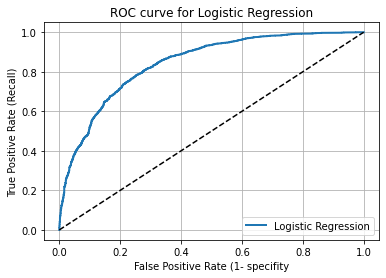

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(model, X_train_prepared, train_label_binary, cv= 10, method = "decision_function")  #decision_function
fpr, tpr, thresholds = roc_curve (train_label_binary, y_scores)

def plot_roc_curve(fpr, tpr, label =None):
  plt.plot(fpr, tpr, linewidth=2, label = label)
  plt.plot([0,1], [0,1], "k--")
plot_roc_curve(fpr, tpr)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1- specifity')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['Logistic Regression'],loc ="lower right")
plt.grid()
plt.show()

**Support Vector Machine Cross validation**

In [ ]:
from sklearn.svm import SVC

hyperparameter_set = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}
svm = SVC()
classifier2 = GridSearchCV(svm, hyperparameter_set, cv=10, verbose =0)
best_model2 = classifier2.fit(X_train_prepared, train_label_binary  )

#printing out the best parameters for SVM model
print('Best kernel:', best_model2.best_params_['kernel'])
print('Best C:', best_model2.best_params_['C'])
print('Best gamma:', best_model2.best_params_['gamma'])

Best kernel: linear
Best C: 0.1
Best gamma: 0.001


In [ ]:
model2 = SVC(C=0.1, kernel= 'linear', gamma = 'scale', probability=True)
model2.fit(X_train_prepared, train_label_binary)
svm_prediction= model2.predict(X_train_prepared)
svm_prediction

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
#calculating the accuracy of the model
scores = cross_val_score(model2, X_train_prepared, train_label_binary )
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.01


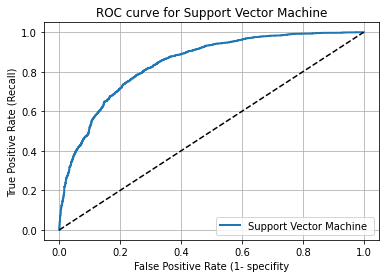

In [ ]:
#Drawing the ROC curve for SVM
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(model, X_train_prepared, train_label_binary, cv= 10, method = "decision_function")
fpr, tpr, thresholds = roc_curve (train_label_binary, y_scores)

def plot_roc_curve(fpr, tpr, label =None):
  plt.plot(fpr, tpr, linewidth=2, label = label)
  plt.plot([0,1], [0,1], "k--")
plot_roc_curve(fpr, tpr)
plt.title('ROC curve for Support Vector Machine')
plt.xlabel('False Positive Rate (1- specifity')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['Support Vector Machine '],loc ="lower right")
plt.grid()
plt.show()

**Random Forest Cross Validation**

In [ ]:
hyperparameter_set = {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt']}
random_forest = RandomForestClassifier()

classifier3 = GridSearchCV(random_forest, hyperparameter_set, cv=10, verbose =0)
best_model3 = classifier3.fit(X_train_prepared, train_label_binary )

print('Best n_estimators:', best_model3.best_params_['n_estimators'])
print('Best max_features:', best_model3.best_params_['max_features'])

Best n_estimators: 400
Best max_features: sqrt


In [ ]:
model3 = RandomForestClassifier(n_estimators = 200, max_features= 'auto')
model3.fit(X_train_prepared, train_label_binary)
random_forest_prediction= model3.predict(X_train_prepared)
random_forest_prediction

array([ True, False, False, ...,  True, False, False])

In [ ]:
#calculating the accuracy of the model
scores = cross_val_score(model3, X_train_prepared, train_label_binary )
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.01


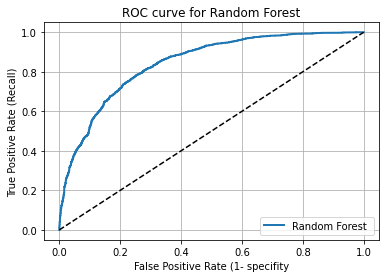

In [ ]:
#Drawing the ROC curve for SVM
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(model, X_train_prepared, train_label_binary, cv= 10, method = "decision_function")  #decision_function
fpr, tpr, thresholds = roc_curve (train_label_binary, y_scores)

def plot_roc_curve(fpr, tpr, label =None):
  plt.plot(fpr, tpr, linewidth=2, label = label)
  plt.plot([0,1], [0,1], "k--")
plot_roc_curve(fpr, tpr)
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1- specifity')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['Random Forest '],loc ="lower right")
plt.grid()
plt.show()

**Showing the feature importance analysis in random forest.**

In [ ]:
from pandas import DataFrame
random_forest = RandomForestClassifier(n_estimators = 300, random_state=60)
random_forest.fit(X_train_prepared,train_label_binary)
random_forest_importance = random_forest.feature_importances_
print(random_forest_importance)

[1.11844421e-01 1.52047709e-01 1.21025169e-01 1.70778233e-01
 8.70844475e-02 1.66567255e-02 1.27727478e-02 1.25190884e-02
 1.15231257e-02 5.38530522e-04 1.61614781e-05 1.23670412e-02
 1.04903618e-02 6.41467540e-03 7.07634164e-03 1.28547265e-03
 2.59242029e-03 2.45761269e-03 2.28580036e-02 6.18927015e-03
 2.63263861e-03 5.22837994e-04 8.22698568e-05 7.23367347e-04
 6.51793000e-03 1.42001864e-02 2.66172404e-02 5.18922799e-04
 3.38159664e-05 3.29744399e-05 1.00405725e-02 1.26260640e-02
 4.76854352e-04 1.46727096e-04 2.81686897e-03 5.73964041e-03
 1.79994789e-03 7.80390182e-02 1.43268071e-02 4.12787288e-02
 1.22890284e-02]


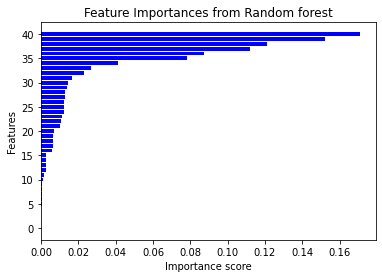

In [ ]:
features = original_df.columns

importances = random_forest_importance
indices = np.argsort(importances)

plt.title('Feature Importances from Random forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance score')
plt.ylabel('Features')
plt.show()

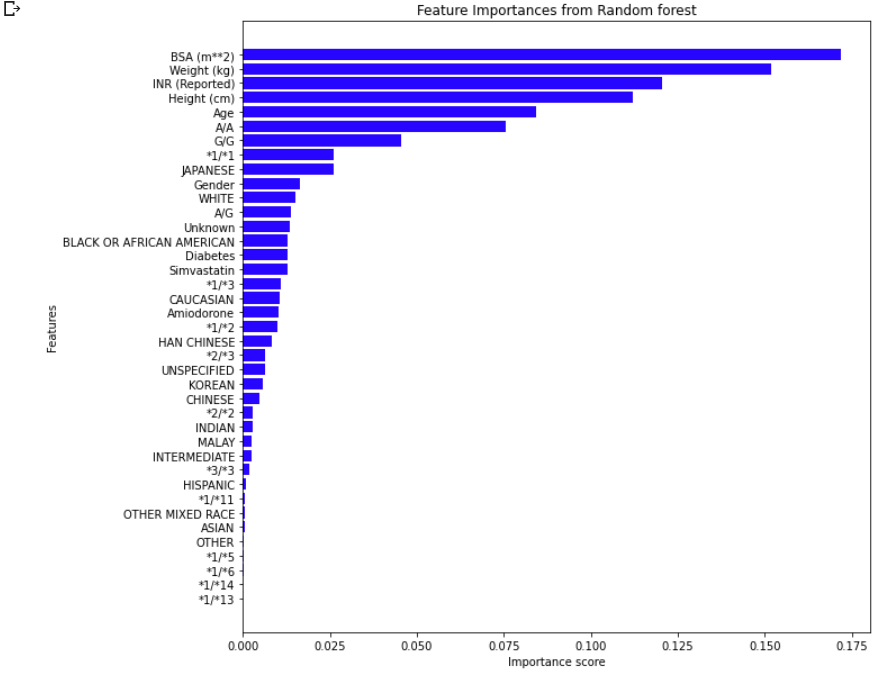

**Calculating the evaluation metrics for each model and then adding the data in pandas DataFrame**





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
predictions = [logistic_prediction,svm_prediction, random_forest_prediction]
names = ["Logistic_regression model","Support Vector Machine model", "Random_forest_model"]
accuracy = []
precision =[]
recall = []
ROC = []
F1= []
for i in predictions:
  accuracyy = accuracy_score(train_label_binary, i)
  accuracy.append(accuracyy)
  precision1 = precision_score(train_label_binary, i)
  precision.append(precision1)
  recall1 = recall_score(train_label_binary, i)
  recall.append(recall1)
  ROC1 = roc_auc_score(train_label_binary, i)
  ROC.append(ROC1)
  F11 = f1_score(train_label_binary, i)
  F1.append(F11)

In [ ]:
data2 = {'Method': names,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC': ROC,
        'F1 score': F1,
        }
evaluation = pd.DataFrame(data2, columns=['Method', "Accuracy", "Precision","Recall", "ROC", "F1 score"])
evaluation

,Method,Accuracy,Precision,Recall,ROC,F1 score
0,Logistic_regression model,0.767016,0.744526,0.744914,0.765236,0.744720
1,Support Vector Machine model,0.765350,0.743335,0.741784,0.763452,0.742559
2,Random_forest_model,0.998572,0.997916,0.998957,0.998603,0.998436


**Drawing the ROC curve of all models on the train dataset**

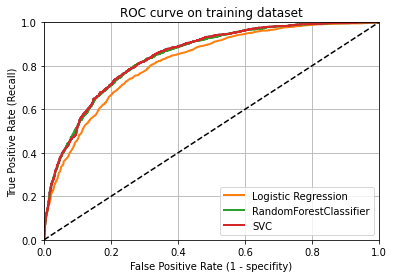

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
roc_curve_rates = []
for model in [model3,model2, model]:  #models are 'Logistic Regression', 'RandomForestClassifier', 'SVC'
  #finds the predicted probability for the sets and model
  predict_probability = cross_val_predict(model, X_train_prepared, train_label_binary, cv= 10, method = "predict_proba")
  #gets the probs for pos class
  y_scorse = predict_probability[:,1]
  #calculates the fpr and tpr with te scores
  fpr, tpr, threshold = roc_curve(train_label_binary, y_scorse)
  roc_curve_rates.append({'fpr': fpr, 'tpr': tpr})


#Takes the dics array and plots each line on the same graph
line_names = ['Logistic Regression', 'RandomForestClassifier', 'SVC']
plt.plot(fpr, tpr, linewidth=2)
for i in range(len(roc_curve_rates)):
  plt.plot(roc_curve_rates[i]['fpr'], roc_curve_rates[i]['tpr'], linewidth=2, label=line_names[i])
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], "k--")
plt.title('ROC curve on training dataset')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc ="lower right")
plt.grid()
plt.show()

**Optimizing the Neural Network**

In [ ]:
# Parameters to check
number_of_layers = [3, 4, 5, 6, 7]
number_of_neurons = [10, 100, 100, 5000]

# Variables for saving data
best_epoch = [[]];
best_accuracy = [[]];
i = 0;

# Add early stopping into model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
]

# Loop through all parameters
for layers in number_of_layers:
  for neurons in number_of_neurons:
    print("Testing NN - Layers: "+ str(layers) + "; Neurons per layer:" + str(neurons))
    NN_model = build_NN(layers, neurons)
    train_history = NN_model.fit(X_train_prepared, train_label_binary.values.ravel(), validation_data=(X_val_prepared,validation_label_binary.values.ravel()), batch_size=128, epochs = 30, callbacks=keras_callbacks)
    # Using validation accuracy as performance metric
    accuracy = train_history.history['val_accuracy']
    best_accuracy[i].append(max(accuracy))
    best_epoch[i].append(accuracy.index(max(accuracy)))
  i = i + 1;
  best_epoch.append([])
  best_accuracy.append([])

# Remove last element
best_epoch.pop(i)
best_accuracy.pop(i)

Testing NN - Layers: 3; Neurons per layer:10
Epoch 1/30
33/33 [==============================] - 1s 8ms/step - loss: 0.7337 - accuracy: 0.5219 - val_loss: 0.6409 - val_accuracy: 0.6347
Epoch 2/30
33/33 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.6366 - val_loss: 0.5903 - val_accuracy: 0.7159
Epoch 3/30
33/33 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.6921 - val_loss: 0.5436 - val_accuracy: 0.7601
Epoch 4/30
33/33 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.7173 - val_loss: 0.5123 - val_accuracy: 0.7565
Epoch 5/30
33/33 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7313 - val_loss: 0.4930 - val_accuracy: 0.7528
Epoch 6/30
33/33 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7439 - val_loss: 0.4756 - val_accuracy: 0.7675
Epoch 7/30
33/33 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7506 - val_loss: 0.463

[]

In [ ]:
# Build model with best parameters
ideal_layers_index = best_accuracy.index(max(best_accuracy))
ideal_layers = number_of_layers[ideal_layers_index]
ideal_neurons = number_of_neurons[best_accuracy[ideal_layers_index].index(max(best_accuracy[ideal_layers_index]))]

# Print Results
print("Best number of layers:", str(ideal_layers))
print("Best number of neurons:", str(ideal_neurons))

Best number of layers: 3
Best number of neurons: 100


## **Evaluate all the models on the Test Set**

In [ ]:
#Logistic Regression
logistic_regression_final_model = LogisticRegression(solver ='liblinear', **best_model.best_params_)
logistic_regression_final_model.fit(X_train_prepared, train_label_binary )
logistic_prediction_test= logistic_regression_final_model.predict(X_test_prepared)
logistic_prediction_test

array([ True,  True,  True, ..., False, False,  True])

In [ ]:
#Support Vector Machine
SVM_final_model = SVC(C=0.1, kernel= 'linear', gamma = 'scale', probability=True)
SVM_final_model.fit(X_train_prepared, train_label_binary)
svm_prediction_test= SVM_final_model.predict(X_test_prepared)
svm_prediction_test

array([ True,  True,  True, ..., False, False,  True])

In [ ]:
# Random Forest Classifier
random_forest_final_model = RandomForestClassifier(n_estimators = 400, max_features= 'sqrt')
random_forest_final_model.fit(X_train_prepared, train_label_binary)
random_forest_prediction_test= random_forest_final_model.predict(X_test_prepared)
random_forest_prediction_test


array([ True,  True,  True, ...,  True, False,  True])

In [ ]:
# Neural Network
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]
NN_final_model = build_NN(ideal_layers, ideal_neurons, dropout=0.15)
NN_final_model.fit(X_train_prepared, train_label_binary, validation_data=(X_val_prepared,validation_label_binary.values.ravel()), batch_size=128, epochs = 30, callbacks=keras_callbacks)
NN_prediction_test= NN_final_model.predict(X_test_prepared)

# Prepare prediction to be comparable
NN_prediction_test = (NN_prediction_test >= NN_threshold)

Epoch 1/30
33/33 [==============================] - 1s 9ms/step - loss: 0.6186 - accuracy: 0.6426 - val_loss: 0.5092 - val_accuracy: 0.7417
Epoch 2/30
33/33 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.7147 - val_loss: 0.4665 - val_accuracy: 0.7749
Epoch 3/30
33/33 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7468 - val_loss: 0.4448 - val_accuracy: 0.7749
Epoch 4/30
33/33 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.7513 - val_loss: 0.4462 - val_accuracy: 0.7749
Epoch 5/30
33/33 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.7518 - val_loss: 0.4422 - val_accuracy: 0.7786
Epoch 6/30
33/33 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.7518 - val_loss: 0.4431 - val_accuracy: 0.7749
Epoch 7/30
33/33 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.7618 - val_loss: 0.4372 - val_accuracy: 0.7970
Epoch 8/30
33/33 [==

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
predictions = [logistic_prediction_test,svm_prediction_test, random_forest_prediction_test,NN_prediction_test]
names = ["Logistic_regression_test","Support Vector machine_test", "Random_forest_test","Neural_net_test"]
accuracy = []
precision =[]
recall = []
ROC = []
F1= []
for i in predictions:
  accuracyy = accuracy_score(test_label_binary, i)
  accuracy.append(accuracyy)
  precision1 = precision_score(test_label_binary, i)
  precision.append(precision1)
  recall1 = recall_score(test_label_binary, i)
  recall.append(recall1)
  ROC1 = roc_auc_score(test_label_binary, i)
  ROC.append(ROC1)
  F11 = f1_score(test_label_binary, i)
  F1.append(F11)

In [ ]:
data3 = {'Method': names,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC': ROC,
        'F1 score': F1,
        }
evaluation = pd.DataFrame(data3, columns=['Method', "Accuracy", "Precision","Recall", "ROC", "F1 score"])
evaluation

,Method,Accuracy,Precision,Recall,ROC,F1 score
0,Logistic_regression_test,0.786870,0.765657,0.778234,0.786280,0.771894
1,Support Vector machine_test,0.781161,0.761711,0.767967,0.780260,0.764826
2,Random_forest_test,0.761180,0.734127,0.759754,0.761082,0.746720
3,Neural_net_test,0.761180,0.755411,0.716632,0.758139,0.735511


**Trade-off between precision and recall** **for** :

1.   Logistic Regression
2.   Support Vector Machine
1.   Random Forest






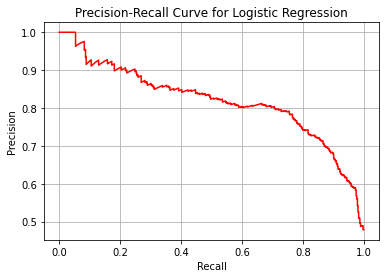

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = logistic_regression_final_model.predict_proba(X_test_prepared)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_label_binary, y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='red')
#add axis labels to plot
ax.set_title('Precision-Recall Curve for Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.grid(True)
plt.show()


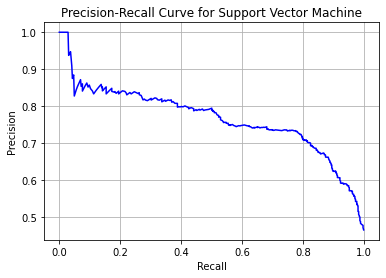

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = random_forest_final_model.predict_proba(X_test_prepared)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_label_binary, y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')
#add axis labels to plot
ax.set_title('Precision-Recall Curve for Support Vector Machine')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.grid(True)
plt.show()

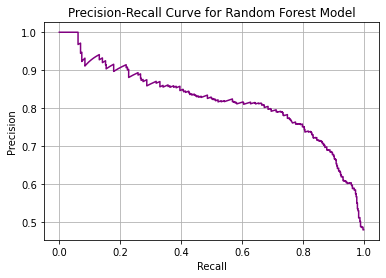

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = SVM_final_model.predict_proba(X_test_prepared)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_label_binary, y_score)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest Model')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.grid(True)
plt.show()

**Drawing the ROC curve of all models on the test dataset**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
roc_curve_rates = []
for model in [logistic_regression_final_model, random_forest_final_model,SVM_final_model]:  #models are 'Logistic Regression', 'RandomForestClassifier', 'SVC'
  #finds the predicted probability for the sets and model
  predict_probability = cross_val_predict(logistic_regression_final_model, X_test_prepared, test_label_binary, cv= 10, method = "predict_proba")
  #gets the probs for pos class
  y_scorse = predict_probability[:,1]
  #calculates the fpr and tpr with te scores
  fpr, tpr, threshold = roc_curve(test_label_binary, y_scorse)
  roc_curve_rates.append({'fpr': fpr, 'tpr': tpr})

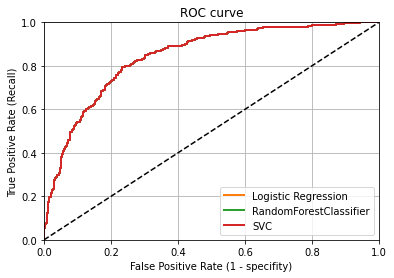

In [ ]:
#Takes the dics array and plots each line on the same graph
line_names = ['Logistic Regression', 'RandomForestClassifier', 'SVC']
plt.plot(fpr, tpr, linewidth=2)
for i in range(len(roc_curve_rates)):
  plt.plot(roc_curve_rates[i]['fpr'], roc_curve_rates[i]['tpr'], linewidth=2, label=line_names[i])
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], "k--")
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc ="lower right")
plt.grid()
plt.show()

# **PART III ----> Gradio Implementation**

In [ ]:
# Install Gradio
!pip install --quiet gradio

In [ ]:
# Import Gradio Library
import gradio as gr

In [ ]:
# Define callback function
def warfarin_callback(age, height, weight, gender, race, diabetes, medication, Cyp2C9, VKORC1, INR, model):
  # Input validation
  if not gender:
    return "Please select the patient's gender"
  if not race:
    return "Please select the patient's race"

  # Extract medication
  simvastatin = 0.0
  amiodarone = 0.0
  if 'Simvastatin (Zocor)' in medication: simvastatin = 1.0
  if 'Amiodarone (Cordarone)' in medication: amiodarone = 1.0
  # Categorize age
  age_categories = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90+']
  age_category = age_categories[int(np.floor(age/10)) - 1]

  # Gender, Race (Reported), Age, Height (cm), Weight (kg), Diabetes, Simvastatin (Zocor), Amiodarone (Cordarone), Target INR, INR on Reported Therapeutic Dose of Warfarin, Cyp2C9 genotypes, VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
  input_df = pd.DataFrame([[gender.lower(), race, age_category, height, weight, float(diabetes), simvastatin, amiodarone, 0.0, INR, Cyp2C9, VKORC1]], columns=["Gender", "Race (Reported)", "Age", "Height (cm)", "Weight (kg)", "Diabetes", "Simvastatin (Zocor)", "Amiodarone (Cordarone)", "Target INR", "INR on Reported Therapeutic Dose of Warfarin", "Cyp2C9 genotypes", "VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T"])
  preprocessed_input_df = full_preprocess_function(input_df)

  # Model Selection
  if model == "Logistic Regression":
    prediction = (logistic_regression_final_model.predict(preprocessed_input_df))
  elif model == "Support Vector Machine":
    prediction = (SVM_final_model.predict(preprocessed_input_df))
  elif model == "Random Forest":
    prediction = (random_forest_final_model.predict(preprocessed_input_df))
  elif model == "Neural Network":
    prediction = (NN_final_model.predict(preprocessed_input_df))
    prediction = prediction > NN_threshold
  else:
    return "Please select a Machine Learning Model"

  if prediction:
    return "The recommended Warfarin Dose is >=30mg"
  else:
    return "The recommended Warfarin Dose is <30mg"


In [ ]:
# Define output module as Warfarin dose
output_dose = gr.Textbox(label = "Warfarin Dose")

# Define all input modules
input_age = gr.Slider(10, 100, step=1, label = "Age", default=30)
input_height = gr.Number(label = "Height (cm)")
input_weight = gr.Number(label = "Weight (kg)")
input_gender = gr.Radio(choices=["Male", "Female"], label = "Gender")
input_race = gr.Dropdown(choices=['Asian', 'Black or African American', 'Caucasian', 'Chinese', 'Han Chinese', 'Hispanic', 'Indian', 'Intermediate', 'Japanese', 'Korean', 'Malay', 'Other','Other Mixed Race', 'Unspecified', 'White'], label = "Race")
input_diabetes = gr.Checkbox(label = "Is the patient Diabetic?")
input_medication = gr.CheckboxGroup(["Simvastatin (Zocor)", "Amiodarone (Cordarone)"], label = "Is the patient taking any of the following medication?")
input_Cyp269 = gr.Dropdown(['*1/*1', '*1/*11', '*1/*13', '*1/*14', '*1/*2', '*1/*3', '*1/*5', '*1/*6', '*2/*2', '*2/*3', '*3/*3'], label = "Cyp2C9 genotype")
input_VKORC1 = gr.Dropdown(['A/A', 'A/G', 'G/G', 'Unknown'], label = "VKORC1 genotype")
input_INR = gr.Slider(1, 5, step=0.01, label = "INR on Reported Therapeutic Dose of Warfarin", default=2.45)
input_model = gr.Dropdown(choices=["Logistic Regression", "Support Vector Machine", "Random Forest", "Neural Network" ], label = "Machine Learning Model")

gr.Interface(fn=warfarin_callback, inputs=[input_age, input_height, input_weight,input_gender, input_race, input_diabetes, input_medication, input_Cyp269, input_VKORC1, input_INR, input_model], outputs=output_dose).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Slider, please remove them: {'default': 30}
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Slider, please remove them: {'default': 2.45}
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
